# Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [3]:
users = pd.read_csv("dataset/users.csv", index_col=0)

In [4]:
users.head()

,name,lang,bot,created_at,statuses_count
id,,,,,
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


In [5]:
users.shape

(11508, 5)

In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


In [6]:
len(set(users.index))

11508

## Name

show the records with Null names

In [7]:
users[users.name.isna()]

,name,lang,bot,created_at,statuses_count
id,,,,,
2166124159,NaN,en,0,2018-11-02 06:39:14,6566.0


In [8]:
null_names_ids = users.name.isna()

## Lang

In [9]:
users.lang.unique()

array(['en', 'it', 'fr', 'ru', 'es', 'tr', 'en-gb', 'pt', 'nl', 'id',
       'zh-tw', 'ja', 'de', 'ko', 'en-AU', 'da', 'ar', 'en-GB',
       'Select Language...', 'zh-TW', 'zh-cn', 'pl', 'el', 'fil', 'sv',
       'xx-lc'], dtype=object)

In [10]:
users.lang.value_counts()

en                    9970
it                     906
es                     319
pt                      65
en-gb                   50
ru                      42
fr                      36
ja                      33
zh-tw                   17
tr                      14
id                      12
ko                       9
de                       8
nl                       6
en-GB                    4
ar                       3
zh-TW                    3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

In [11]:
users.bot.unique()

array([1, 0])

In [12]:
users.bot.value_counts()

1    6116
0    5392
Name: bot, dtype: int64

## Created_at

In [13]:
try:
    pd.to_datetime(users['created_at'], format='%Y-%m-%d %H:%M:%S', errors='raise')
    # do something
    print("All the dates are ok!")
except ValueError as e:
    print(e)


All the dates are ok!


In [14]:
users.created_at.min()

'2012-01-24 01:57:38'

In [15]:
users.created_at.max()

'2020-04-21 07:28:31'

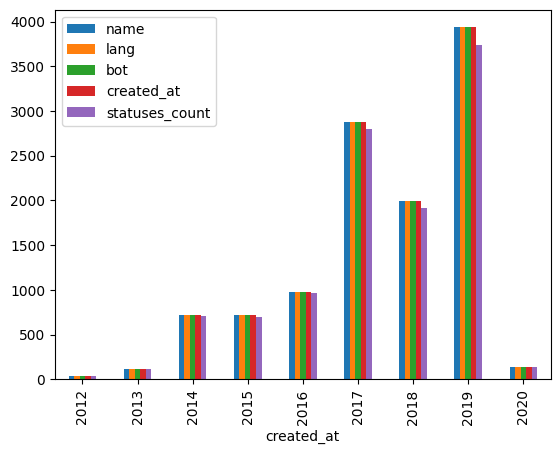

In [16]:
users.groupby(pd.to_datetime(users['created_at'], format='%Y-%m-%d %H:%M:%S', errors='raise').dt.year).count().plot(kind="bar")
plt.show()

## Statuses_count

In [17]:
null_statuses_count_ids = users.statuses_count.isna()

In [18]:
users.statuses_count[~null_statuses_count_ids].describe()

count     11109.000000
mean       5883.312359
std       19073.007305
min           0.000000
25%          41.000000
50%          68.000000
75%        2916.000000
max      399555.000000
Name: statuses_count, dtype: float64

In [19]:
users[users.bot == 0].statuses_count[~null_statuses_count_ids].describe()

count      4993.000000
mean      11638.219107
std       26719.438432
min           0.000000
25%          61.000000
50%        2041.000000
75%       11585.000000
max      399555.000000
Name: statuses_count, dtype: float64

In [20]:
users[users.bot == 1].statuses_count[~null_statuses_count_ids].describe()

count      6116.000000
mean       1185.102845
std        5373.550630
min           0.000000
25%          32.000000
50%          53.000000
75%          78.000000
max      214410.000000
Name: statuses_count, dtype: float64

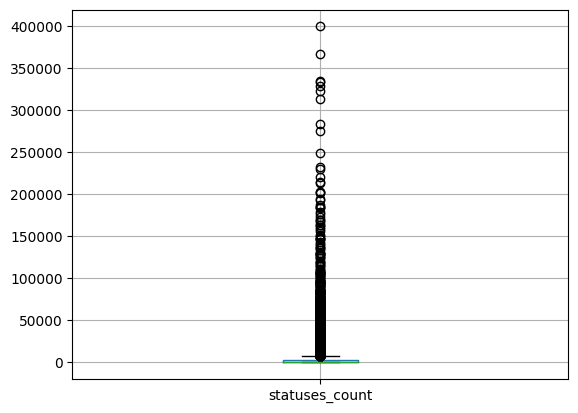

In [21]:
pd.DataFrame(users.statuses_count[~null_statuses_count_ids]).boxplot()
plt.show()

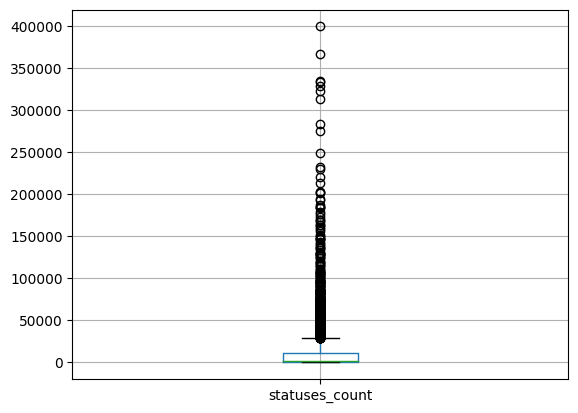

In [22]:
pd.DataFrame(users[users.bot == 0].statuses_count[~null_statuses_count_ids]).boxplot()
plt.show()

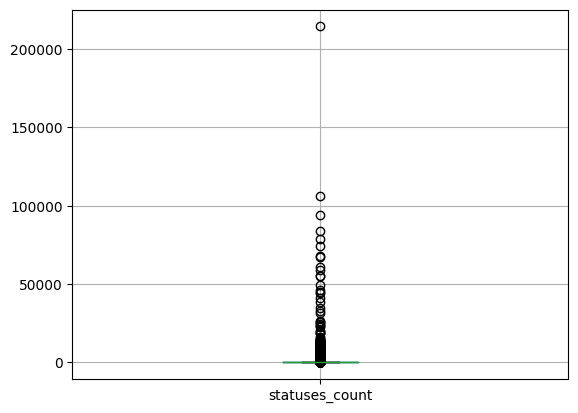

In [23]:
pd.DataFrame(users[users.bot == 1].statuses_count[~null_statuses_count_ids]).boxplot()
plt.show()

## Tweets

In [2]:
tweets = pd.read_csv("dataset/tweets.csv", index_col=0)

In [3]:
tweets.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [4]:
tweets.shape

(13664696, 9)

In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13664696 entries, 509354017856950272 to 486479812614451200
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         object
 1   retweet_count   object
 2   reply_count     object
 3   favorite_count  object
 4   num_hashtags    object
 5   num_urls        object
 6   num_mentions    object
 7   created_at      object
 8   text            object
dtypes: object(9)
memory usage: 1.0+ GB


## Index

In [6]:
# see the distribution of the lenght of the index
vlen = np.vectorize(lambda x: len(str(x)))
indexes = pd.Series(vlen(tweets.index.to_numpy()))

In [7]:
indexes.describe()

count    1.366470e+07
mean     1.703782e+01
std      2.834986e+00
min      3.000000e+00
25%      1.800000e+01
50%      1.800000e+01
75%      1.800000e+01
max      1.800000e+01
dtype: float64

In [8]:
indexes.value_counts()

18    11768032
10      260089
17      257383
9       244274
8       243829
11      196364
15      190738
16      190716
7        73470
6        56160
5        54575
4        54307
3        53785
14       18930
13        1838
12         206
dtype: int64

In [10]:
# see if some indexes are duplicated
index_value_counts = tweets.index.value_counts()
print(index_value_counts)

dmy                   14
qsa                   12
jgm                   11
nis                   11
rdw                   11
                      ..
39790722903            1
2315433335             1
588516208669904896     1
582303273803243521     1
486479812614451200     1
Name: id, Length: 11672135, dtype: int64


In [12]:
# we can see that some index are not numbers and are duplicated
# which index are duplicated
index_value_counts[index_value_counts > 1]

dmy                   14
qsa                   12
jgm                   11
nis                   11
rdw                   11
                      ..
525746165019840513     2
314469529713512448     2
552992073792499712     2
427843738061533185     2
512636477051002880     2
Name: id, Length: 1969699, dtype: int64

In [14]:
print(f"number of duplicated rows: {index_value_counts[index_value_counts > 1].sum()}")

number of duplicated indexes: 3962258


In [16]:
print(f"difference between number of unique id and the number of duplication: {3962258 - 1969699}")

difference between number of unique id and the number of duplication: 1992559


In [33]:
# drop duplicated rows
not_duplicated_tweets = tweets.drop_duplicates()

In [17]:
not_duplicated_tweets.shape

(11712093, 9)

In [18]:
print(f"removed rows : {13664696 - 11712093}")

removed rows : 1952603


In [20]:
index_value_counts = not_duplicated_tweets.index.value_counts()
print(index_value_counts)

dmy                   14
qsa                   12
mxo                   11
nis                   11
rdw                   11
                      ..
472403921332613120     1
583261659797426176     1
361607898599657473     1
582869903788634113     1
486479812614451200     1
Name: id, Length: 11671631, dtype: int64


In [21]:
not_duplicated_tweets.loc["dmy"]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
dmy,2882736641,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-24 17:07:08,NaN
dmy,138492664,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-29 13:07:05,NaN
dmy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-10 01:52:25,NaN
dmy,467136996,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-17 06:21:50,NaN
dmy,816485959,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-09 17:24:53,NaN
dmy,531252639,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-08 21:28:02,NaN
dmy,520977237,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-06 01:58:36,NaN
dmy,535901760,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-06 04:07:20,NaN
dmy,2351661655,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-07 04:55:39,NaN


In [22]:
not_duplicated_tweets.loc["qsa"]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
qsa,2969210974,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-16 07:17:30,NaN
qsa,466307762,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-20 06:17:27,NaN
qsa,521093819,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-08 17:46:58,NaN
qsa,614197225,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-01 21:16:45,NaN
qsa,2528822924,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-12 01:56:45,NaN
qsa,2462247966,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-18 04:36:32,NaN
qsa,466426767,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-18 05:18:46,NaN
qsa,290054590,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-12 00:10:40,NaN
qsa,141883652,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-05 09:45:16,NaN


In [51]:
# we can see strange entries for non numerical indexes, try to eliminate them
non_numerical_indexes_ids = pd.Series(not_duplicated_tweets.index.str.isnumeric())

In [52]:
non_numerical_indexes_ids[non_numerical_indexes_ids.isna()] = False

In [54]:
not_duplicated_tweets_2 = not_duplicated_tweets[non_numerical_indexes_ids.to_numpy()]

In [55]:
not_duplicated_tweets_2.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [57]:
index_value_counts = not_duplicated_tweets_2.index.value_counts()
print(index_value_counts)

35695732              2
64474136              2
36322718              2
41862725              2
41466620              2
                     ..
583731329663021056    1
421595173718876161    1
593166415777177600    1
511007179747639296    1
486479812614451200    1
Name: id, Length: 11278006, dtype: int64


In [59]:
not_duplicated_tweets_2.loc["35695732"]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
35695732,2973235579,NaN,NaN,NaN,NaN,0.0,NaN,2020-03-31 04:08:59,RT @Randall_Jr: “@Drrake: This music video turnt
35695732,467123525,NaN,NaN,NaN,NaN,z9up3zr,0,2019-08-19 05:29:35,"Che bella la riconoscenza, sorride sempre ed Ã..."


In [60]:
not_duplicated_tweets_2.loc["41862725"]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
41862725,21074492,0,NaN,NaN,NaN,NaN,NaN,2018-07-21 09:03:40,NaN
41862725,1394115517,0,NaN,NaN,NaN,NaN,NaN,2020-03-10 12:35:58,NaN


In [62]:
# remove the rows that has duplicated id
not_duplicated_tweets_2 = not_duplicated_tweets_2[np.array(index_value_counts == 1)]

ValueError: Item wrong length 11278006 instead of 11277779.

In [63]:
index_value_counts = not_duplicated_tweets_2.index.value_counts()
print(index_value_counts)

509354017856950272    1
526655281070354432    1
517840566323658752    1
554851723580547073    1
20410298239662340     1
                     ..
513166938588323840    1
512241681509658624    1
461453382058668032    1
487189855966089216    1
486479812614451200    1
Name: id, Length: 11277779, dtype: int64


In [64]:
tweets = not_duplicated_tweets_2

## User_id

In [65]:
tweets.user_id.value_counts()

491630583     3929
497404180     3919
1693274954    3906
157029836     3903
164940888     3903
              ... 
rndcpig          1
bcn9opu8         1
hgxb             1
gvq2a98          1
tzn9s6bwj        1
Name: user_id, Length: 194944, dtype: int64

In [66]:
unique_user_id = tweets.user_id.unique()
print(len(unique_user_id))

194945


In [67]:
# vettorializzare, capire come rendere più veloce

def is_natural(x):
    # return true if x is a natural number
    if np.isreal(x):
        return x == np.floor(x)
    else:
        return False

In [68]:
numeric_user_id = pd.to_numeric(tweets.user_id, errors='coerce')

In [69]:
nan_ids_user_id = numeric_user_id.isna()

In [70]:
print(f"non numerical ids {np.sum(nan_ids_user_id)}")

non numerical ids 376065


In [71]:
value_counts_number_user_id = tweets.user_id[~nan_ids_user_id].value_counts()
print(value_counts_number_user_id)

491630583     3929
497404180     3919
1693274954    3906
157029836     3903
164940888     3903
              ... 
779              1
1208102538       1
854253           1
23e6             1
261              1
Name: user_id, Length: 12188, dtype: int64


In [38]:
# notiamo che alcuni user_id sono ambigui ("0e1"),
# in una seconda fase, quando andremo a fare un join tra la
# tabella dei tweets e la tabella degli utenti andremo ad eliminare i valori che non hanno un corrispettivo id
# nella tabella degli utenti.

In [111]:
# function to handle non negative numerical values, to deal with outliers and to

def function_handle_nnn(feature_name = None):
    # transform data to numeric
    numeric_count = pd.to_numeric(tweets[feature_name], errors="coerce")
    
    na_ids_count = numeric_count.isna()
    inf_ids_count = numeric_count.apply(np.isinf)
    negative_ids_count = numeric_count.apply(lambda x: x<0)
    
    print(np.sum(na_ids_count))
    print(np.sum(inf_ids_count))
    print(np.sum(negative_ids_count))
    
    valid_numbers = ~np.logical_or(na_ids_count, inf_ids_count, negative_ids_count)
    
    description = numeric_count[valid_numbers].describe()
    print(description)
    
    numeric_count[valid_numbers].value_counts()
    
    mode = numeric_count[valid_numbers].mode()
        
    # remove nan number
    numeric_count[~valid_numbers] = mode
    
    # remove outliers
    IQR = numeric_count.quantile(0.75) - numeric_count.quantile(0.25)
    outlier_value = numeric_count.quantile(0.75) + 1.5*IQR
    print(outlier_value)
    numeric_count[numeric_count>outlier_value] = outlier_value
    
    print(numeric_count.value_counts())
    
    pd.DataFrame(numeric_count).boxplot()
    plt.show()
    
    return numeric_count

## Retweet_count

507024
1
0
count     1.077075e+07
mean     1.856880e+127
std      6.094063e+130
min       0.000000e+00
25%       0.000000e+00
50%       0.000000e+00
75%       1.000000e+00
max      2.000000e+134
Name: retweet_count, dtype: float64
2.5


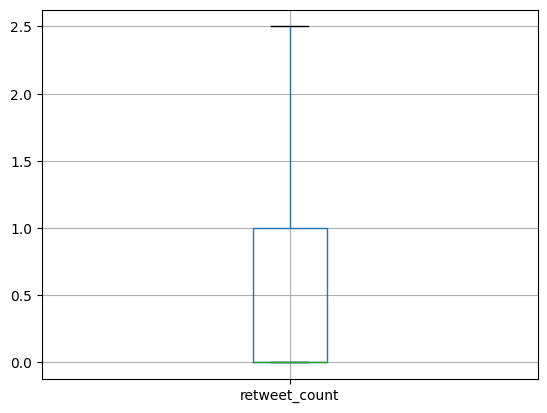

In [110]:
cleaned_retweet_count = function_handle_nnn("retweet_count")

## reply count

637466
1
0
count     1.064031e+07
mean     1.879644e+103
std      6.131304e+106
min       0.000000e+00
25%       0.000000e+00
50%       0.000000e+00
75%       0.000000e+00
max      2.000000e+110
Name: reply_count, dtype: float64
0.0
0.0    10640312
Name: reply_count, dtype: int64


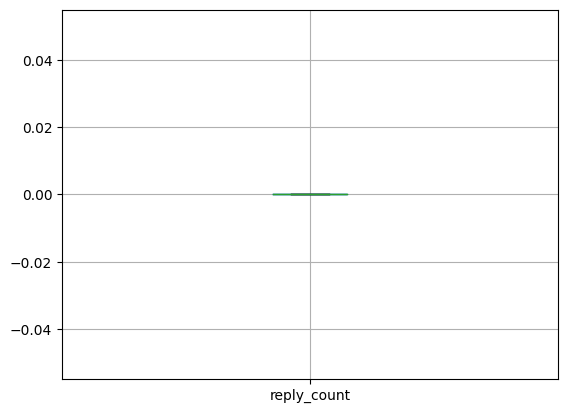

In [112]:
cleaned_reply_count = function_handle_nnn("reply_count")

## Favorite count

636574
0
1
count     1.064120e+07
mean     6.578202e+204
std                inf
min      -1.000000e+00
25%       0.000000e+00
50%       0.000000e+00
75%       0.000000e+00
max      7.000000e+211
Name: favorite_count, dtype: float64
0.0
 0.0    10641204
-1.0           1
Name: favorite_count, dtype: int64


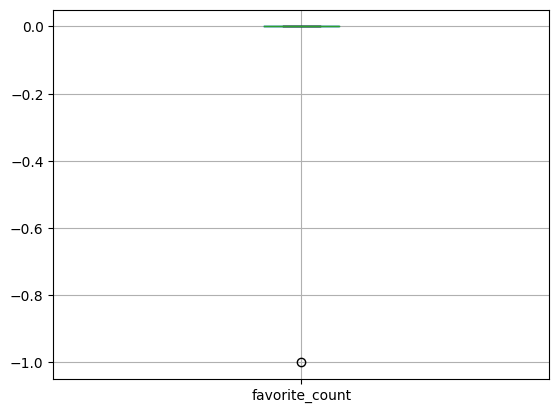

In [113]:
cleaned_favorite_count = function_handle_nnn("favorite_count")

## num hashtags

897811
0
0
count     1.037997e+07
mean     6.743759e+146
std      2.172701e+150
min       0.000000e+00
25%       0.000000e+00
50%       0.000000e+00
75%       0.000000e+00
max      7.000000e+153
Name: num_hashtags, dtype: float64
0.0
0.0    10379968
Name: num_hashtags, dtype: int64


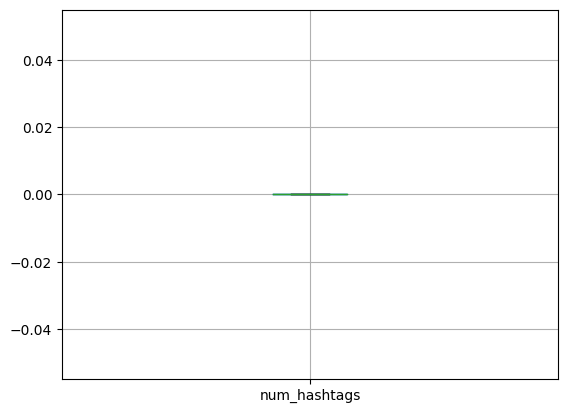

In [114]:
cleaned_num_hashtags = function_handle_nnn("num_hashtags")

## Num urls

637168
0
0
count     1.064061e+07
mean     9.397957e+202
std                inf
min       0.000000e+00
25%       0.000000e+00
50%       0.000000e+00
75%       0.000000e+00
max      1.000000e+210
Name: num_urls, dtype: float64
0.0
0.0    10640611
Name: num_urls, dtype: int64


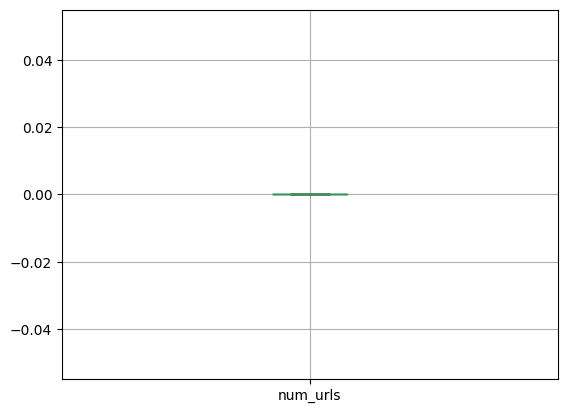

In [115]:
cleaned_num_ursl = function_handle_nnn("num_urls")

## Num mentions

767371
0
0
count    1.051041e+07
mean     5.708627e+90
std      1.850723e+94
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      6.000000e+97
Name: num_mentions, dtype: float64
2.5
0.0    6265032
1.0    3408954
2.0     595760
2.5     240662
Name: num_mentions, dtype: int64


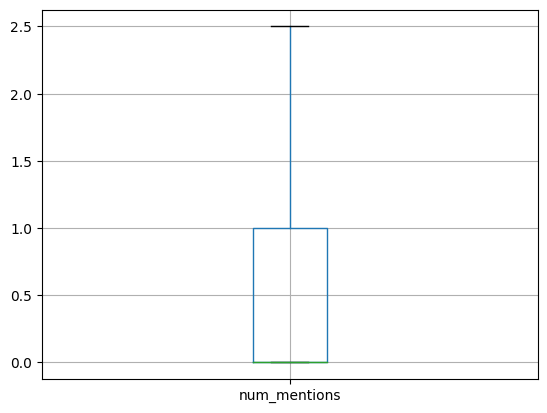

In [116]:
cleaned_num_mentions = function_handle_nnn("num_mentions")

In [ ]:
# substitute the columns

## numerical correlations

In [117]:
numerical_cols = ["retweet_count", "reply_count", "favorite_count", "num_hashtags", "num_urls", "num_mentions"]

In [118]:
sub_numerical_tweets = tweets[numerical_cols]

In [119]:
# pulire prima i dati!!!

sub_numerical_tweets.sample(10000).corr()

/var/folders/h6/9j84q4q56zd3nyy8fl00jw0w0000gn/T/ipykernel_11655/2399571586.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sub_numerical_tweets.sample(10000).corr()


""


## Created at

In [160]:
try:
    pd.to_datetime(tweets.created_at, format='%Y-%m-%d %H:%M:%S', errors='raise')
    # do something
    print("All the dates are ok!")
except ValueError as e:
    print(e)

All the dates are ok!


In [161]:
# prima della creazione di tweetter
tweets.created_at.min()

'1953-04-17 12:24:33'

In [162]:
# nel futuro
tweets.created_at.max()

'2040-04-27 11:03:25'